In [5]:
#imports
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

#plot a confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#load the dataset
path = "."

filename_read = os.path.join(path, "heart.csv")
df = pd.read_csv(filename_read)
df - df.reindex(np.random.permutation(df.index))

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
print("Number of patients with heart disease: " + str(len(df[df.target == 1])))
print("Number of patients without heart disease: " + str(len(df[df.target == 0])))
print("Number of male patients: " + str(len(df[df.sex == 1])))
print("Number of female patients: " + str(len(df[df.sex == 0])))

Number of patients with heart disease: 165
Number of patients without heart disease: 138
Number of male patients: 207
Number of female patients: 96


Text(0, 0.5, 'Maximum heart rate')

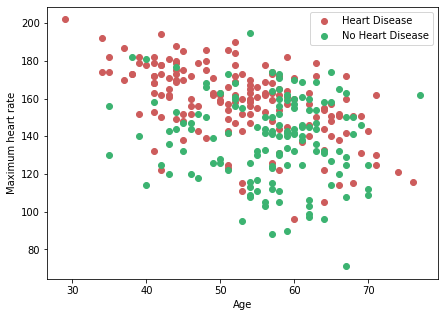

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="indianred")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="mediumseagreen")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")

kNN Accuracy: 0.705
Confusion matrix, without normalization
[[16  7]
 [11 27]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.29 0.71]]


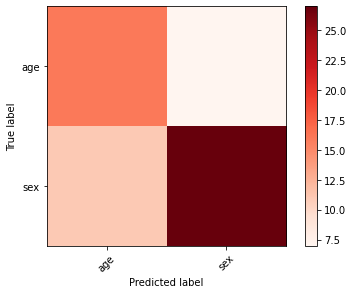

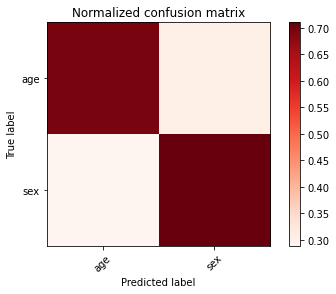

In [8]:
#get X and y values
X = df.drop('target', axis=1)
y = df.target.values

#columns to plot on the confusion matrix
cols = ['age', 'sex']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2, random_state=9) 

#build a knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)

#print results
print('kNN Accuracy: %.3f' % accuracy_score(y_test, y_pred))

#print confusion matrix numerically, using library method
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, cols, title='')

#graphical plots of confusion matrix using method above
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, cols, title='Normalized confusion matrix')
plt.show()